In [1]:
import pyterrier as pt
import pandas as pd
import numpy as np
from pyterrier.measures import RR, nDCG, MAP

import nlpaug.augmenter.char as nac
# import nlpaug.augmenter.word as naw
# import nlpaug.augmenter.sentence as nas
import nlpaug.flow as naf

# from nlpaug.util import Action
from common_helpers import *

In [ ]:
# dataset_path = "irds:beir/fiqa"
# dataset = pt.get_dataset(dataset_path)
# testset = pt.get_dataset(dataset_path + "/test")
# test_queries = testset.get_topics()

Java started (triggered by _pt_tokeniser) and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]


In [ ]:
# from pathlib import Path

# indexer = pt.IterDictIndexer(
#     str(Path.cwd()),  # this will be ignored
#     type=pt.index.IndexingType.MEMORY,
#     fields=["text"]
# )
# index_ref = indexer.index(dataset.get_corpus_iter())

beir/fiqa documents: 100%|██████████| 57638/57638 [00:56<00:00, 1022.07it/s]


In [3]:
# bm25 = pt.terrier.Retriever(index_ref, wmodel="BM25")

# models = [bm25]
metrics = [RR @ 10, nDCG @ 10, MAP @ 100]
noise_levels = np.arange(0.0, 0.5, 0.1)

cer = np.arange(0.0, 0.5, 0.05)
wer_b_1 = np.arange(0.0, 0.5, 0.05)
wer_b_2 = np.arange(0.0, 1, 0.1)


noise_combinations = [
    {"sub": 1.0, "ins": 0.0, "del": 0.0},  # Only substitution
    # {"sub": 0.0, "ins": 1.0, "del": 0.0},  # Only insertion
    # {"sub": 0.0, "ins": 0.0, "del": 1.0},  # Only deletion
    {"sub": 0.5, "ins": 0.5, "del": 0.0},  # Substitution + Insertion
    {"sub": 0.5, "ins": 0.0, "del": 0.5},  # Substitution + Deletion
    # {"sub": 0.0, "ins": 0.5, "del": 0.5},  # Insertion + Deletion
    {"sub": 0.33, "ins": 0.33, "del": 0.33},  # Equal mix
]

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Plot
# plt.figure(figsize=(6, 5), dpi=150)
# plt.plot(cer, wer_b_1, 'o-', label="Batch 1", color="dodgerblue")
# plt.plot(cer, wer_b_2, 'o-', label="Batch 2", color="salmon")
# # plt.plot(cer_values, wer_values, 'o-', label="Batch 3", color="mediumseagreen")

# # Labels and title
# plt.xlabel("Target CER")
# plt.ylabel("Target WER")
# plt.title("Target CER and WER per batch")
# plt.legend()

# # Remove grid
# plt.grid(False)

# # Show plot
# plt.show()


: 

In [4]:
import Levenshtein

def calc_cer(reference: str, hypothesis: str) -> float:
    """
    Compute the Character Error Rate (CER) between a reference sentence and a hypothesis.
    
    Parameters:
        reference (str): The ground truth sentence.
        hypothesis (str): The predicted sentence.

    Returns:
        float: CER value (lower is better).
    """
    distance = Levenshtein.distance(reference, hypothesis)
    return distance / max(1, len(reference))  # Avoid division by zero

# Example usage
ref = "hello world"
hyp = "helo wrld"
print(f"CER: {calc_cer(ref, hyp):.4f}")


CER: 0.1818


In [ ]:
# !pip install -q git+https://github.com/terrierteam/pyterrier_colbert.git

if not pt.started():
    pt.init()

from pyterrier_colbert.ranking import ColBERTFactory

# pytcolbert = ColBERTFactory("C:/Users/begum/Documents/IR_Project/colbert.dnn", ".\content", "colbertindex")
pytcolbert = ColBERTFactory("C:/Users/begum/Documents/IR_Project/colbert.dnn", ".\\vaswani", "colbertvaswaniindex")
bm25 = pt.BatchRetrieve(pt.get_dataset("vaswani").get_index(), wmodel="BM25")

dense_e2e = pytcolbert.end_to_end()

sparse_colbert = bm25 >> pytcolbert.text_scorer()

testset = pt.get_dataset("vaswani")
test_queries = testset.get_topics()

C:\Users\begum\AppData\Local\Temp\ipykernel_21744\815025651.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) started. (use pt.java.started() instead) -- Deprecated since version 0.11.0.
  if not pt.started():
c:\Users\begum\miniconda3\envs\irenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of ColBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['linear.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[Mar 31, 21:17:13] #> Loading model checkpoint.
[Mar 31, 21:17:13] #> Loading checkpoint C:/Users/begum/Documents/IR_Project/colbert.dnn
[Mar 31, 21:17:14] #> checkpoint['epoch'] = 0
[Mar 31, 21:17:14] #> checkpoint['batch'] = 44500


c:\Users\begum\miniconda3\envs\irenv\lib\site-packages\colbert\utils\amp.py:14: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
C:\Users\begum\AppData\Local\Temp\ipykernel_21744\815025651.py:10: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  bm25 = pt.BatchRetrieve(pt.get_dataset("vaswani").get_index(), wmodel="BM25")


[Mar 31, 21:17:15] #> Loading the FAISS index from .\vaswani\colbertvaswaniindex\ivfpq.faiss ..
[Mar 31, 21:17:15] #> Building the emb2pid mapping..
[Mar 31, 21:17:15] len(self.emb2pid) = 581496
Loading reranking index, memtype=mem


Loading index shards to memory: 100%|██████████| 1/1 [00:00<00:00,  6.36shard/s]

2

1:17:16.340 [main] WARN org.terrier.applications.batchquerying.TRECQuery -- trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8


In [14]:
pt.Experiment(
    [bm25, dense_e2e],
    pt.get_dataset("vaswani").get_topics().head(1),
    pt.get_dataset("vaswani").get_qrels(),
    eval_metrics=[RR @ 10, nDCG @ 10, MAP @ 100],
    names = ["bm25", "ColBERT"]
)

22:25:24.102 [main] WARN org.terrier.applications.batchquerying.TRECQuery -- trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8


c:\Users\begum\miniconda3\envs\irenv\lib\site-packages\colbert\utils\amp.py:32: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else nullcontext()


,name,RR@10,nDCG@10,AP@100
0,bm25,1.0,0.57369,0.235032
1,ColBERT,1.0,0.63322,0.373211


In [34]:
bm25 = pt.BatchRetrieve(pt.get_dataset("vaswani").get_index(), wmodel="BM25", metadata=['docno', 'text'])
sparse_colbert = bm25 >> pytcolbert.text_scorer()

pt.Experiment(
    [bm25, dense_e2e, sparse_colbert],
    pt.get_dataset("vaswani").get_topics().iloc[:2],
    pt.get_dataset("vaswani").get_qrels(),
    eval_metrics=[RR @ 10, nDCG @ 10, MAP @ 100],
    names = ["bm25", "ColBERT", "BM25 + ColBERT"]
)

22:38:54.467 [main] WARN org.terrier.applications.batchquerying.TRECQuery -- trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8


C:\Users\begum\AppData\Local\Temp\ipykernel_21744\3729406641.py:1: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  bm25 = pt.BatchRetrieve(pt.get_dataset("vaswani").get_index(), wmodel="BM25", metadata=['docno', 'text'])
c:\Users\begum\miniconda3\envs\irenv\lib\site-packages\colbert\utils\amp.py:32: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else nullcontext()
c:\Users\begum\miniconda3\envs\irenv\lib\site-packages\colbert\utils\amp.py:32: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else nullcontext()


,name,RR@10,nDCG@10,AP@100
0,bm25,0.666667,0.341868,0.135919
1,ColBERT,0.625000,0.364004,0.217101
2,BM25 + ColBERT,0.000000,0.042572,0.010940


In [6]:
from tqdm import tqdm
# tfidf = pt.terrier.Retriever(index_ref, wmodel="TF_IDF")

# Run Experiment
retrievers = {
    # "TF-IDF": tfidf,
    "BM25": bm25,
    "ColBERT": dense_e2e,
    # "SparseColBERT": sparse_colbert,
}

results_batch_1 = []
results_batch_2 = []

for noise_config in tqdm(noise_combinations):
    
    sub_prob = noise_config["sub"]
    ins_prob = noise_config["ins"]
    del_prob = noise_config["del"]

    # Batch 1
    results_for_augmentor_1 = []

    for model_name, retriever in retrievers.items():

        results_for_model = []

        for index in range(len(cer)):

            aug = naf.Sequential([
                nac.RandomCharAug(action="substitute", aug_word_p=wer_b_1[index], aug_char_p=(sub_prob * cer[index]), spec_char=""),
                nac.RandomCharAug(action="insert", aug_word_p=wer_b_1[index], aug_char_p=(ins_prob * cer[index]), spec_char=""),
                nac.RandomCharAug(action="delete", aug_word_p=wer_b_1[index], aug_char_p=(del_prob * cer[index]), spec_char="")
            ])

            noisy_queries_list = []

            actual_cer = 0.0

            for _, row in test_queries.iterrows():
                noisy_query = aug.augment(row['query'])
                noisy_query = " ".join(noisy_query) if isinstance(noisy_query, list) else noisy_query
                noisy_queries_list.append({'qid': row['qid'], 'query': noisy_query})

                actual_cer += calc_cer(row['query'], noisy_query)

            noisy_queries_df = pd.DataFrame(noisy_queries_list)
            noisy_queries_df["qid"] = noisy_queries_df["qid"].astype(str)

            actual_cer = actual_cer / len(test_queries)

            eval_result = pt.Experiment(
                [retriever],
                noisy_queries_df.head(50),
                testset.get_qrels(),
                eval_metrics=[RR @ 10, nDCG @ 10, MAP @ 100]
            )

            results_for_model.append({
                "noise_level": actual_cer,
                "results": eval_result
            })

        results_for_augmentor_1.append({
            "model_name": model_name,
            "results": results_for_model
        })

    results_batch_1.append({
        "noise_config": noise_config,
        "results": results_for_augmentor_1
    })

    # Batch 2
    results_for_augmentor_2 = []

    for model_name, retriever in retrievers.items():

        results_for_model = []

        for index in range(len(cer)):

            aug = naf.Sequential([
                nac.RandomCharAug(action="substitute", aug_word_p=wer_b_2[index], aug_char_p=(sub_prob * cer[index]), spec_char=""),
                nac.RandomCharAug(action="insert", aug_word_p=wer_b_2[index], aug_char_p=(ins_prob * cer[index]), spec_char=""),
                nac.RandomCharAug(action="delete", aug_word_p=wer_b_2[index], aug_char_p=(del_prob * cer[index]), spec_char="")
            ])

            noisy_queries_list = []

            actual_cer = 0.0

            for _, row in test_queries.iterrows():
                noisy_query = aug.augment(row['query'])
                noisy_query = " ".join(noisy_query) if isinstance(noisy_query, list) else noisy_query
                noisy_queries_list.append({'qid': row['qid'], 'query': noisy_query})

                actual_cer += calc_cer(row['query'], noisy_query)

            noisy_queries_df = pd.DataFrame(noisy_queries_list)
            noisy_queries_df["qid"] = noisy_queries_df["qid"].astype(str)

            actual_cer = actual_cer / len(test_queries)

            eval_result = pt.Experiment(
                [retriever],
                noisy_queries_df.head(50),
                testset.get_qrels(),
                eval_metrics=[RR @ 10, nDCG @ 10, MAP @ 100]
            )

            results_for_model.append({
                "noise_level": actual_cer,
                "results": eval_result
            })

        results_for_augmentor_2.append({
            "model_name": model_name,
            "results": results_for_model
        })

    results_batch_2.append({
        "noise_config": noise_config,
        "results": results_for_augmentor_2
    })


  0%|          | 0/4 [00:00<?, ?it/s]

c:\Users\begum\miniconda3\envs\irenv\lib\site-packages\colbert\utils\amp.py:32: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else nullcontext()
c:\Users\begum\miniconda3\envs\irenv\lib\site-packages\colbert\utils\amp.py:32: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else nullcontext()
c:\Users\begum\miniconda3\envs\irenv\lib\site-packages\colbert\utils\amp.py:32: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast() if self.activated else nullcontext()
c:\Users\begum\miniconda3\envs\irenv\lib\site-packages\colbert\utils\amp.py:32: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast

In [7]:
results_batch_1

[{'noise_config': {'sub': 1.0, 'ins': 0.0, 'del': 0.0},
  'results': [{'model_name': 'BM25',
    'results': [{'noise_level': 0.046026528075737136,
      'results':                 name     RR@10   nDCG@10    AP@100
      0  TerrierRetr(BM25)  0.551881  0.337098  0.190767},
     {'noise_level': 0.045967752876257054,
      'results':                 name     RR@10   nDCG@10    AP@100
      0  TerrierRetr(BM25)  0.556667  0.338464  0.197513},
     {'noise_level': 0.06542732896416184,
      'results':                 name     RR@10   nDCG@10   AP@100
      0  TerrierRetr(BM25)  0.386913  0.243769  0.12027},
     {'noise_level': 0.10289139540086738,
      'results':                 name     RR@10   nDCG@10    AP@100
      0  TerrierRetr(BM25)  0.303024  0.176353  0.088276},
     {'noise_level': 0.12854617502112312,
      'results':                 name     RR@10   nDCG@10    AP@100
      0  TerrierRetr(BM25)  0.268579  0.119178  0.056224},
     {'noise_level': 0.16032195350163092,
      're

In [ ]:
results_batch_2

[{'noise_config': {'sub': 1.0, 'ins': 0.0, 'del': 0.0},
  'results': [{'model_name': 'BM25',
    'results': [{'noise_level': 0.04551259482950538,
      'results':                 name     RR@10   nDCG@10    AP@100
      0  TerrierRetr(BM25)  0.643294  0.354673  0.201221},
     {'noise_level': 0.06260376319893603,
      'results':                 name  RR@10   nDCG@10    AP@100
      0  TerrierRetr(BM25)  0.517  0.323734  0.168195},
     {'noise_level': 0.10258205753317362,
      'results':                 name     RR@10   nDCG@10    AP@100
      0  TerrierRetr(BM25)  0.273857  0.166882  0.081615},
     {'noise_level': 0.16377078067389125,
      'results':                 name     RR@10   nDCG@10    AP@100
      0  TerrierRetr(BM25)  0.155389  0.092862  0.059959},
     {'noise_level': 0.21313938866006032,
      'results':                 name     RR@10   nDCG@10    AP@100
      0  TerrierRetr(BM25)  0.133333  0.067043  0.041663},
     {'noise_level': 0.2778824377489407,
      'results':

In [10]:
import pickle

# Save results_batch_2 to a file
with open("results_batch_1.pkl", "wb") as file:
    pickle.dump(results_batch_2, file)

print("results_batch_1 saved to results_batch_1.pkl")

results_batch_1 saved to results_batch_1.pkl


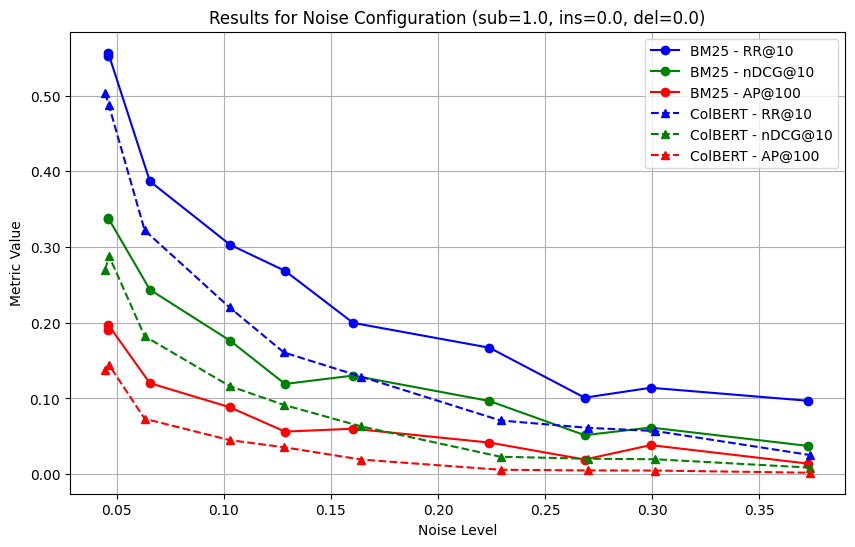

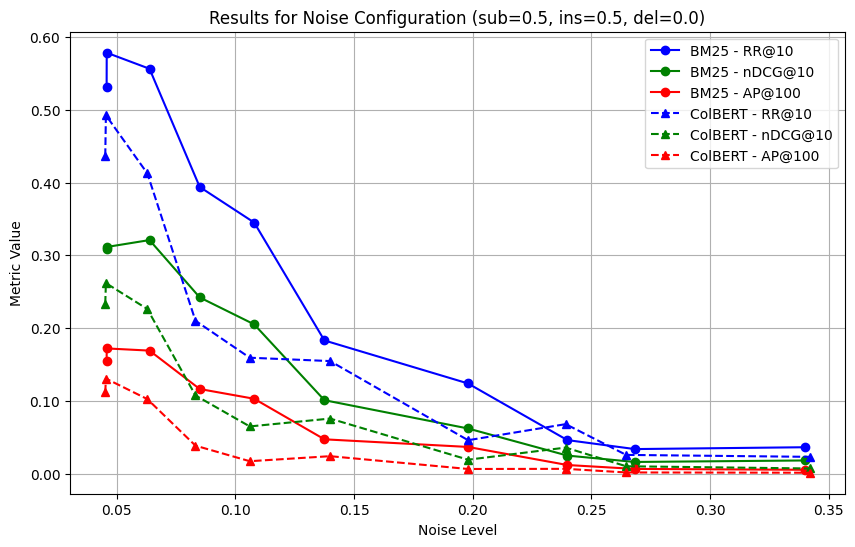

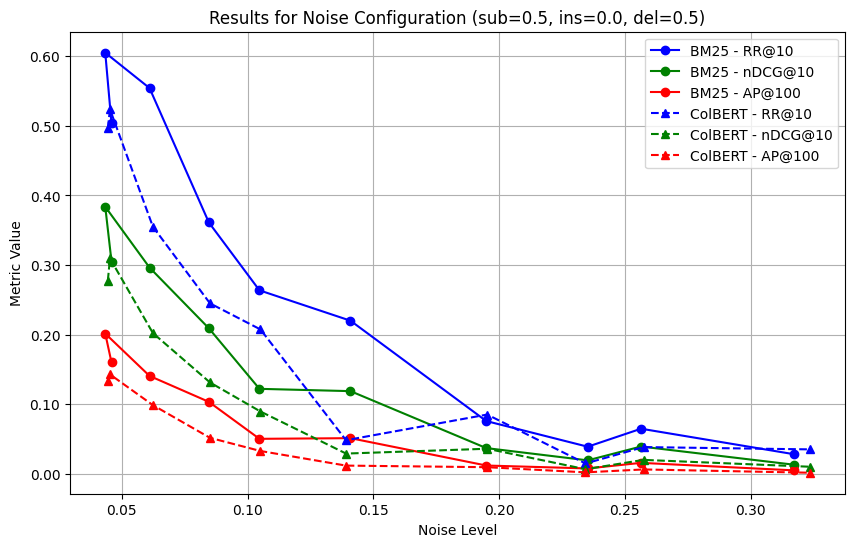

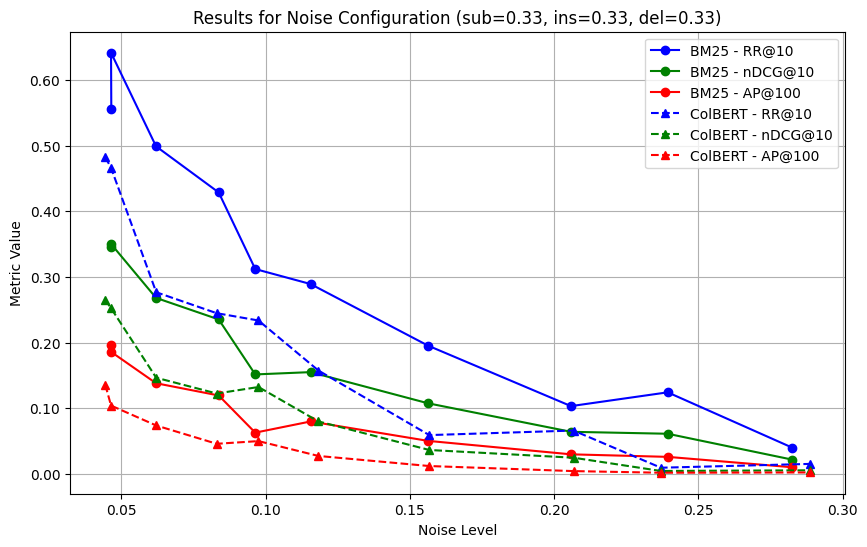

In [11]:
from matplotlib.ticker import FuncFormatter

# Define metrics and colors for each one
metrics = ['RR@10', 'nDCG@10', 'AP@100']
colors = ['b', 'g', 'r']

# Function to format y-axis values
def format_yaxis(value, _):
    return f"{value:.2f}"

# Loop through the data and plot for each noise configuration
for noise_config_data in results_batch_1:
    noise_config = noise_config_data['noise_config']
    results = noise_config_data['results']
    
    plt.figure(figsize=(10, 6))
    
    for model_data in results:
        model_name = model_data['model_name']
        model_results = model_data['results']
        
        for metric_index, metric in enumerate(metrics):
            noise_levels = [result['noise_level'] for result in model_results]
            metric_values = [result['results'][metric] for result in model_results]
            
            # Use triangles for TF-IDF and circles for BM25
            marker = '^' if model_name == 'ColBERT' else 'o'
            line_style = '--' if model_name == 'ColBERT' else '-'
            plt.plot(noise_levels, metric_values, label=f"{model_name} - {metric}", 
                     linestyle=line_style, color=colors[metric_index], marker=marker)
    
    # Set labels and title
    plt.xlabel('Noise Level')
    plt.ylabel('Metric Value')
    plt.title(f"Results for Noise Configuration (sub={noise_config['sub']}, ins={noise_config['ins']}, del={noise_config['del']})")
    plt.legend()
    plt.grid(True)
    
    # Apply y-axis formatter
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))
    
    plt.show()

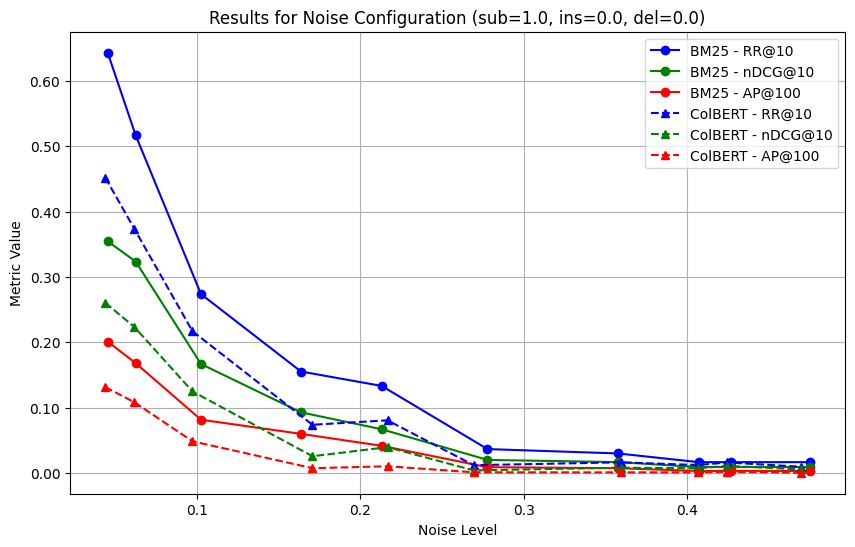

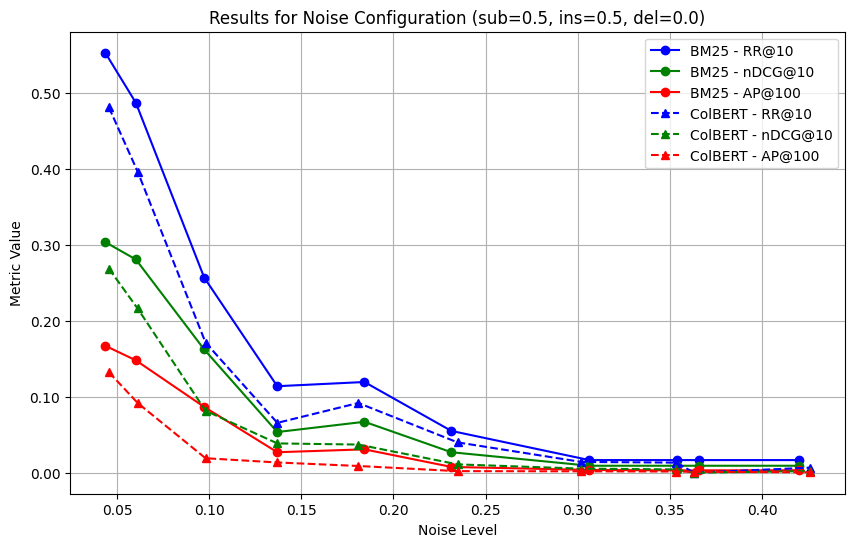

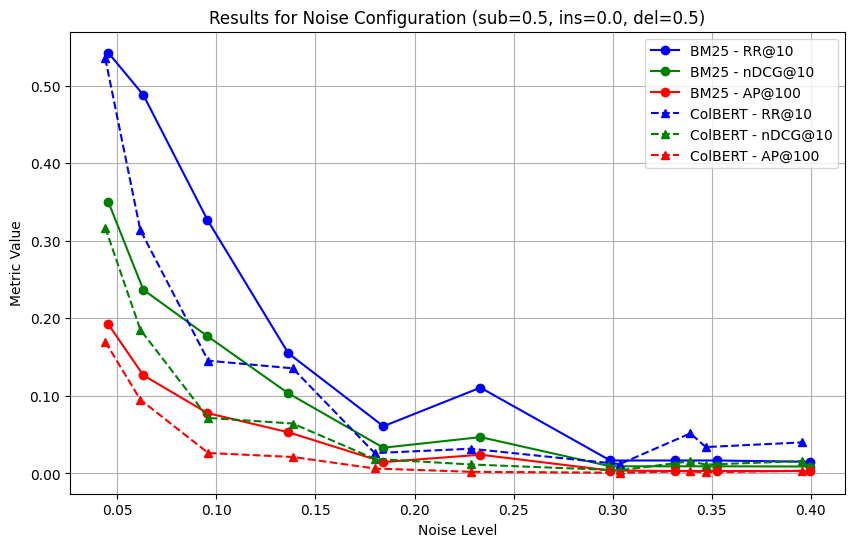

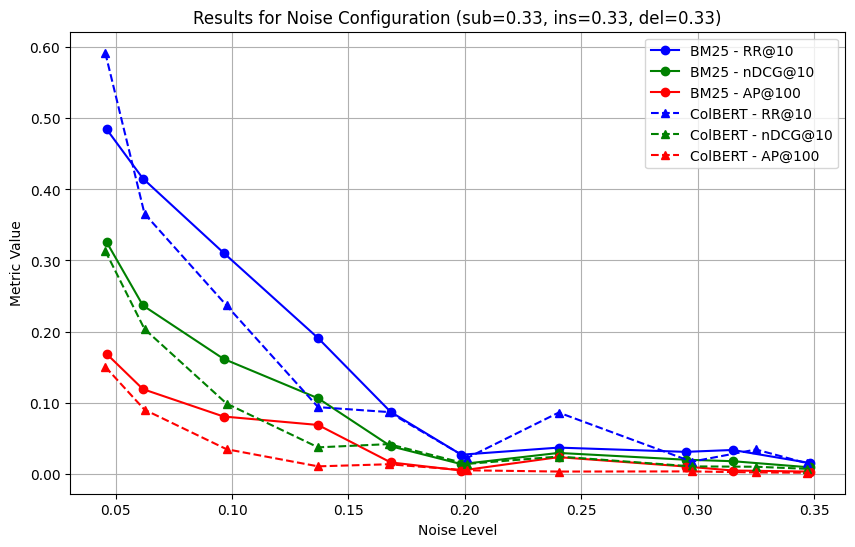

In [12]:
from matplotlib.ticker import FuncFormatter

# Define metrics and colors for each one
metrics = ['RR@10', 'nDCG@10', 'AP@100']
colors = ['b', 'g', 'r']

# Function to format y-axis values
def format_yaxis(value, _):
    return f"{value:.2f}"

# Loop through the data and plot for each noise configuration
for noise_config_data in results_batch_2:
    noise_config = noise_config_data['noise_config']
    results = noise_config_data['results']
    
    plt.figure(figsize=(10, 6))
    
    for model_data in results:
        model_name = model_data['model_name']
        model_results = model_data['results']
        
        for metric_index, metric in enumerate(metrics):
            noise_levels = [result['noise_level'] for result in model_results]
            metric_values = [result['results'][metric] for result in model_results]
            
            # Use triangles for TF-IDF and circles for BM25
            marker = '^' if model_name == 'ColBERT' else 'o'
            line_style = '--' if model_name == 'ColBERT' else '-'
            plt.plot(noise_levels, metric_values, label=f"{model_name} - {metric}", 
                     linestyle=line_style, color=colors[metric_index], marker=marker)
    
    # Set labels and title
    plt.xlabel('Noise Level')
    plt.ylabel('Metric Value')
    plt.title(f"Results for Noise Configuration (sub={noise_config['sub']}, ins={noise_config['ins']}, del={noise_config['del']})")
    plt.legend()
    plt.grid(True)
    
    # Apply y-axis formatter
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))
    
    plt.show()